In [1]:
from keras.datasets import cifar10

In [ ]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from PIL import Image

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [ ]:
print("Training Images: {}".format(X_train.shape))
print("Training Images: {}".format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Training Images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


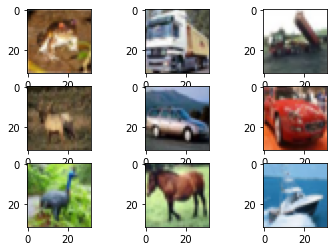

In [ ]:
for i in range(0,9):
  plt.subplot(330+1+i)
  img=X_train[i]
  plt.imshow(img)

plt.show()

In [ ]:
#preprocessing the data
#fix random seed for reproducability
seed=6
np.random.seed(seed)
#load the data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
#normalize the inputs from (0-255) to 0.0-1.0
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
print(y_train[0])

[6]


In [ ]:
# one hot encoding
num_class=y_test.shape[1]
#eg:[6]---[0,0,0,0,0,1,0,0,0,0]---one hot encoding vector
y_train=np_utils.to_categorical(y_train,num_classes=10)
y_test=np_utils.to_categorical(y_test,num_classes=10)
print(y_train.shape)

(50000, 10)


In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Building CNN

1---*Input: 32 x 32 pixel image
2---*3x3 conv, 96 Relu
3---*3x3 conv, 96 Relu
4---*3x3 max-pooling stride 2
5---*3x3 conv, 192 Relu
6---*3x3 conv, 192 Relu
7---*3x3 max-pooling stride 2
8---*3x3 conv, 192 Relu
9---*1x1 conv, 192 Relu
10---*1x1 conv, 10 Relu
11---*global averaging over 6x6 spatial dimensions
12---*10 or 100-way softmax

---





In [ ]:
from keras.models import Sequential #layers one after another
from keras.layers import Dropout,Activation,Conv2D,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
def allcnn(weights=None):
    #define model type -sequential
    model = Sequential()
    #add model layers
    model.add(Conv2D(96,(3,3),padding = 'same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding='same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding='same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1), padding='valid'))
    
    #add global avg pooling layer with softmax activation
    model.add(GlobalAveragePooling2D())
    #add global avg pooling layer with softmax activation
   # model.add(GlobalAveragePooling2D())
    
    #model.add(Activation('softmax'))
    #load the weights
    if weights:
        model.load_weights(weights)
    return model

In [ ]:
#define hyperparameters
learning_rate = 0.01
weight_decay = 1e-6
momentum=0.9

#build model
model = allcnn()
#define optimizer and compile model
sgd = SGD(lr=learning_rate,decay =weight_decay,momentum=momentum,nesterov=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
#print model summary
print(model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_135 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_106 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_107 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 15, 15, 64)      

In [ ]:
#define additional training parameters
#epochs = 350
#batch_size=32
#fit the model
#model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size,verbose =1)

In [ ]:
#load the pre-trained weights as takes more time.use these weights on testing dataset

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
print(X_test.shape)

(10000, 32, 32, 3)


In [ ]:
learning_rate = 0.1
weight_decay = 1e-6
momentum=0.9

#build model & define weights
weights = '/content/all_cnn_weights_0.9088_0.4994 (1).hdf5'
model = allcnn(weights)
#define optimizer and compile model
sgd = SGD(lr=learning_rate,decay =weight_decay,momentum=momentum,nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
#print model summary
print(model.summary())
# test the model with pre-trained weights
scores=model.evaluate(X_test,y_test,verbose=1)
print('accuracy:{}'.format(scores[1]))

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_213 (Conv2D)          (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_171 (Activation)  (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_214 (Conv2D)          (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_172 (Activation)  (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_215 (Conv2D)          (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_51 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_216 (Conv2D)          (None, 16, 16, 192)     

In [ ]:
#define dictionary of class labels and names
classes = range(0,10)
names=['airplane',
      'automobile',
      'bird',
      'cat',
      'deer',
      'dog',
      'frog',
      'horse',
      'ship',
      'truck']
class_labels=dict(zip(classes,names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [ ]:
batch = X_test[100:109]
labels =np.argmax(y_test[100:109],axis=-1)
#make predictions
predictions=model.predict(batch,verbose=1)

1/1 [==============================] - 0s 5ms/step


(10000, 10)


In [ ]:
print(predictions)

[[-9.35304070e+00 -1.54200859e+01  8.18708515e+00  6.00804329e+00
   3.05751476e+01  1.54879999e+01  1.78826809e+00  1.59011860e+01
  -1.28592014e+01 -1.06810236e+01]
 [-1.21824932e+01 -1.45237627e+01  3.63391876e+00  9.46836758e+00
   1.36788237e+00  2.39078484e+01  3.69816113e+00  6.21867466e+00
  -9.33483124e+00 -1.16770821e+01]
 [-1.34889126e+01 -7.50948334e+00  1.72574520e+00  8.27610302e+00
  -6.73786688e+00  6.78945541e+00  5.53479958e+01 -6.72185278e+00
  -1.65113754e+01  2.59346056e+00]
 [-6.69567919e+00 -1.01541691e+01  9.82202530e+00  2.97306480e+01
   5.87196064e+00  2.62342596e+00  1.30815244e+00 -6.12911415e+00
  -1.20352383e+01 -7.58791971e+00]
 [-1.05787754e-01  8.06771088e+01 -2.08844128e+01 -1.09051228e+01
  -2.49383659e+01 -3.13908520e+01 -2.37276707e+01  2.00476646e-02
   1.37612934e+01  3.21266251e+01]
 [ 2.18994069e+00  5.56652412e+01 -4.48321247e+00 -4.42227840e+00
  -1.27335796e+01 -1.01040096e+01 -1.37382240e+01 -4.78752947e+00
  -3.72036099e+00  2.59061203e+01

In [ ]:
#these are class probs, should sum to 1
for image in  predictions:
    print(np.sum(image))

29.634377
0.57668304
23.763271
6.7540927
14.632868
29.772108
6.91506
55.56747
-27.167654


In [ ]:
#convertin class probabilties to labels
class_result=np.argmax(predictions,axis=1)

In [ ]:
print(class_result)

[4 5 6 3 1 1 3 6 8]


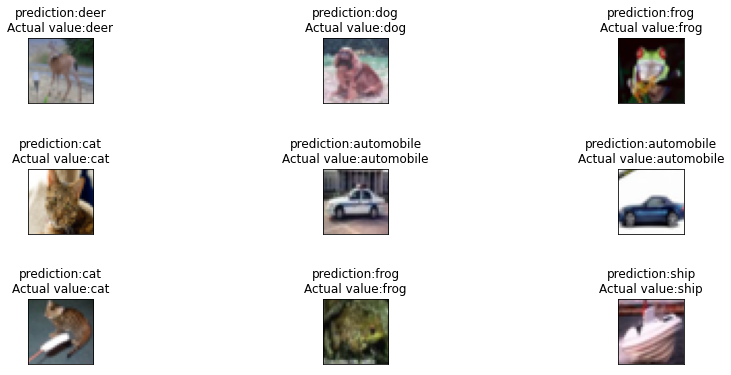

In [ ]:
#grid 3 x 3 images
fig,axs = plt.subplots(3,3,figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()
for i ,img in enumerate(batch):
    #determine label for each prediction,set title:
    for key,value in class_labels.items():
        if class_result[i]==key:
            title='prediction:{}\nActual value:{}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    #plot img
    
    axs[i].imshow(img)
#show the plot
plt.show()